In [45]:
import pandas as pd
import numpy as np

In [46]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [47]:
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

## 1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [48]:
dataset.fillna(0, inplace=True)

In [49]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## 2)How many of them are not placed?

In [50]:
not_placed = (dataset['status'] == 'Not Placed').sum()

In [51]:
print('Not Placed=', not_placed)

Not Placed= 67


## 3)Find the reason for non-placement from the dataset?

In [52]:
dataset.groupby('status')[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']].mean()

,ssc_p,hsc_p,degree_p,mba_p,etest_p
status,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
Not Placed,57.544030,58.395522,61.134179,61.612836,69.587910
Placed,71.721486,69.926554,68.740541,62.579392,73.238041


The reason for non-placement is that students marks are lower than those of placed students.

In [53]:
dataset.groupby(['status', 'workex']).size()

status      workex
0           0          2
Not Placed  No        57
            Yes       10
Placed      No        84
            Yes       64
dtype: int64

Another reason for non-placement is work experience — most students with work experience get placed

## 4)What kind of relation between salary and mba_p?

In [54]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtypes=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan, qual

In [55]:
quan, qual=quanQual(dataset)

In [56]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,0.018430,0.010332,0.042241,0.131946,0.133434,0.022691
ssc_p,0.018430,1.000000,0.638198,0.685426,0.437028,0.600384,0.521234
hsc_p,0.010332,0.638198,1.000000,0.614239,0.421540,0.575724,0.449529
degree_p,0.042241,0.685426,0.614239,1.000000,0.453834,0.681644,0.386447
etest_p,0.131946,0.437028,0.421540,0.453834,1.000000,0.466692,0.221256
mba_p,0.133434,0.600384,0.575724,0.681644,0.466692,1.000000,0.184645
salary,0.022691,0.521234,0.449529,0.386447,0.221256,0.184645,1.000000


In [57]:
dataset[['salary', 'mba_p']].corr()

,salary,mba_p
salary,1.000000,0.184645
mba_p,0.184645,1.000000


## 5)Which specialization is getting minimum salary?

In [58]:
df=dataset[dataset['salary'] > 0]

In [59]:
dataset[dataset['salary'] == df['salary'].min()][['specialisation', 'salary']]

,specialisation,salary
1,Mkt&Fin,200000.0
17,Mkt&Fin,200000.0
46,Mkt&Fin,200000.0
52,Mkt&HR,200000.0
109,Mkt&HR,200000.0
137,Mkt&HR,200000.0


## 6)How many of them getting above 500000 salaries?

In [60]:
dataset[dataset['salary'] > 500000]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
121,120.0,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
152,151.0,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
179,178.0,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


## 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%. (Make decision using Hypothesis Testing)

In [61]:
import scipy.stats as stats
oneway=stats.f_oneway(dataset['etest_p'], dataset['mba_p'])
statistic, p_value=oneway
print("Statistic=", statistic)
print("p_value=", p_value)
if p_value<0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Accept the null hypothesis: There is no significant difference between the groups.")

Statistic= 70.47832202676706
p_value= 6.724993822436055e-16
Reject the null hypothesis: There is a significant difference between the groups.


## 8)Test the similarity between the degree_t (Sci&Tech) and specialisation (Mkt&HR) with respect to salary  at significance level of 5%.(Make decision using Hypothesis Testing)

In [62]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree_t=dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation=dataset[dataset['specialisation']=='Mkt&HR']['salary']
statistic, p_value=ttest_ind(degree_t, specialisation)
print("Statistic=", statistic)
print("p_value=", p_value)
if p_value<0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Accept the null hypothesis: There is no significant difference between the groups.")

Statistic= 2.692041243555374
p_value= 0.007897969943471179
Reject the null hypothesis: There is a significant difference between the groups.


## 9)Convert the normal distribution to standard normal distribution for salary column

C:\Users\jspri\AppData\Local\Temp\ipykernel_3560\1787962733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["salary"])


<Axes: xlabel='salary', ylabel='Density'>

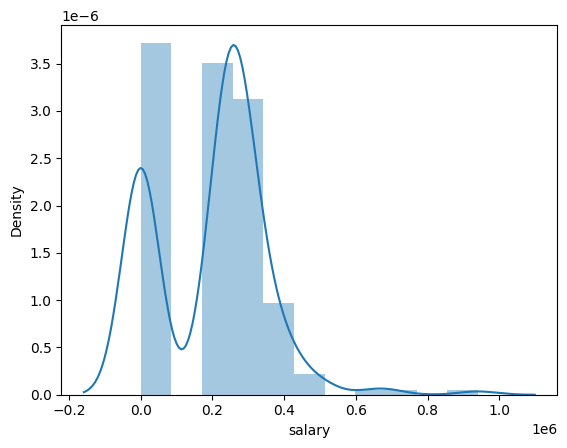

In [63]:
import seaborn as sns
sns.distplot(dataset["salary"])

In [64]:
 #converted to standard normal ditribution
def stdNDFgraph(dataset):
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score, kde=True)
    sum(z_score)/len(z_score)

C:\Users\jspri\AppData\Local\Temp\ipykernel_3560\1063227605.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


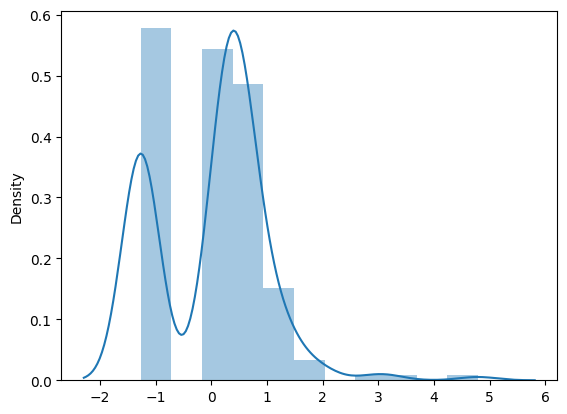

In [65]:
stdNDFgraph(dataset["salary"])

## 10)What is the probability Density Function of the salary range from 700000 to 900000?

In [66]:
def get_pdf_probability(dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Purple')
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    #define the distribution
    dist=norm(sample_mean, sample_std)
    #sample probabilities or a range of outcomes
    values=[value for value in range(startrange, endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({}, {}:{}".format(startrange, endrange, sum(probabilities)))
    return prob

C:\Users\jspri\AppData\Local\Temp\ipykernel_3560\440960902.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Purple')


Mean=196870.968, Standard Deviation=155233.760
The area between range(700000, 900000:0.0005923853374033742


np.float64(0.0005923853374033742)

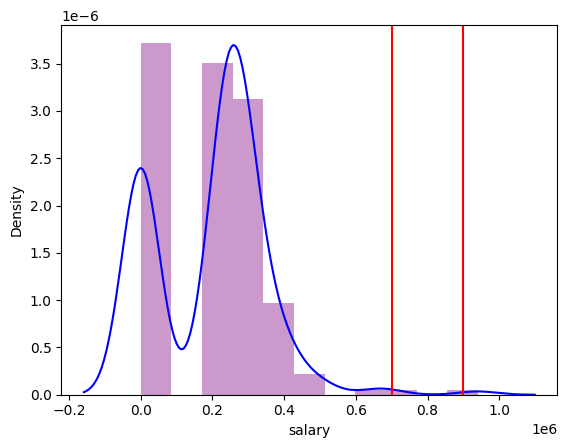

In [67]:
get_pdf_probability(dataset["salary"], 700000, 900000)

## #11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [68]:
from scipy.stats import ttest_rel
dataset=dataset.dropna()
degree_t=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree_t1=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
statistic, p_value=ttest_rel(degree_t, degree_t1)
print("Statistic=", statistic)
print("p_value=", p_value)
if p_value<0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Accept the null hypothesis: There is no significant difference between the groups.")

Statistic= 5.0049844583693615
p_value= 5.517920600505392e-06
Reject the null hypothesis: There is a significant difference between the groups.


## 12)Which parameter is highly correlated with salary?

In [69]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,0.018430,0.010332,0.042241,0.131946,0.133434,0.022691
ssc_p,0.018430,1.000000,0.638198,0.685426,0.437028,0.600384,0.521234
hsc_p,0.010332,0.638198,1.000000,0.614239,0.421540,0.575724,0.449529
degree_p,0.042241,0.685426,0.614239,1.000000,0.453834,0.681644,0.386447
etest_p,0.131946,0.437028,0.421540,0.453834,1.000000,0.466692,0.221256
mba_p,0.133434,0.600384,0.575724,0.681644,0.466692,1.000000,0.184645
salary,0.022691,0.521234,0.449529,0.386447,0.221256,0.184645,1.000000


ssc_p  is the most highly correlated parameter with salary, with a correlation of 0.521. 

## 13) Plot any useful graph and explain it.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
dataset.drop('sl_no', inplace=True, axis=1)

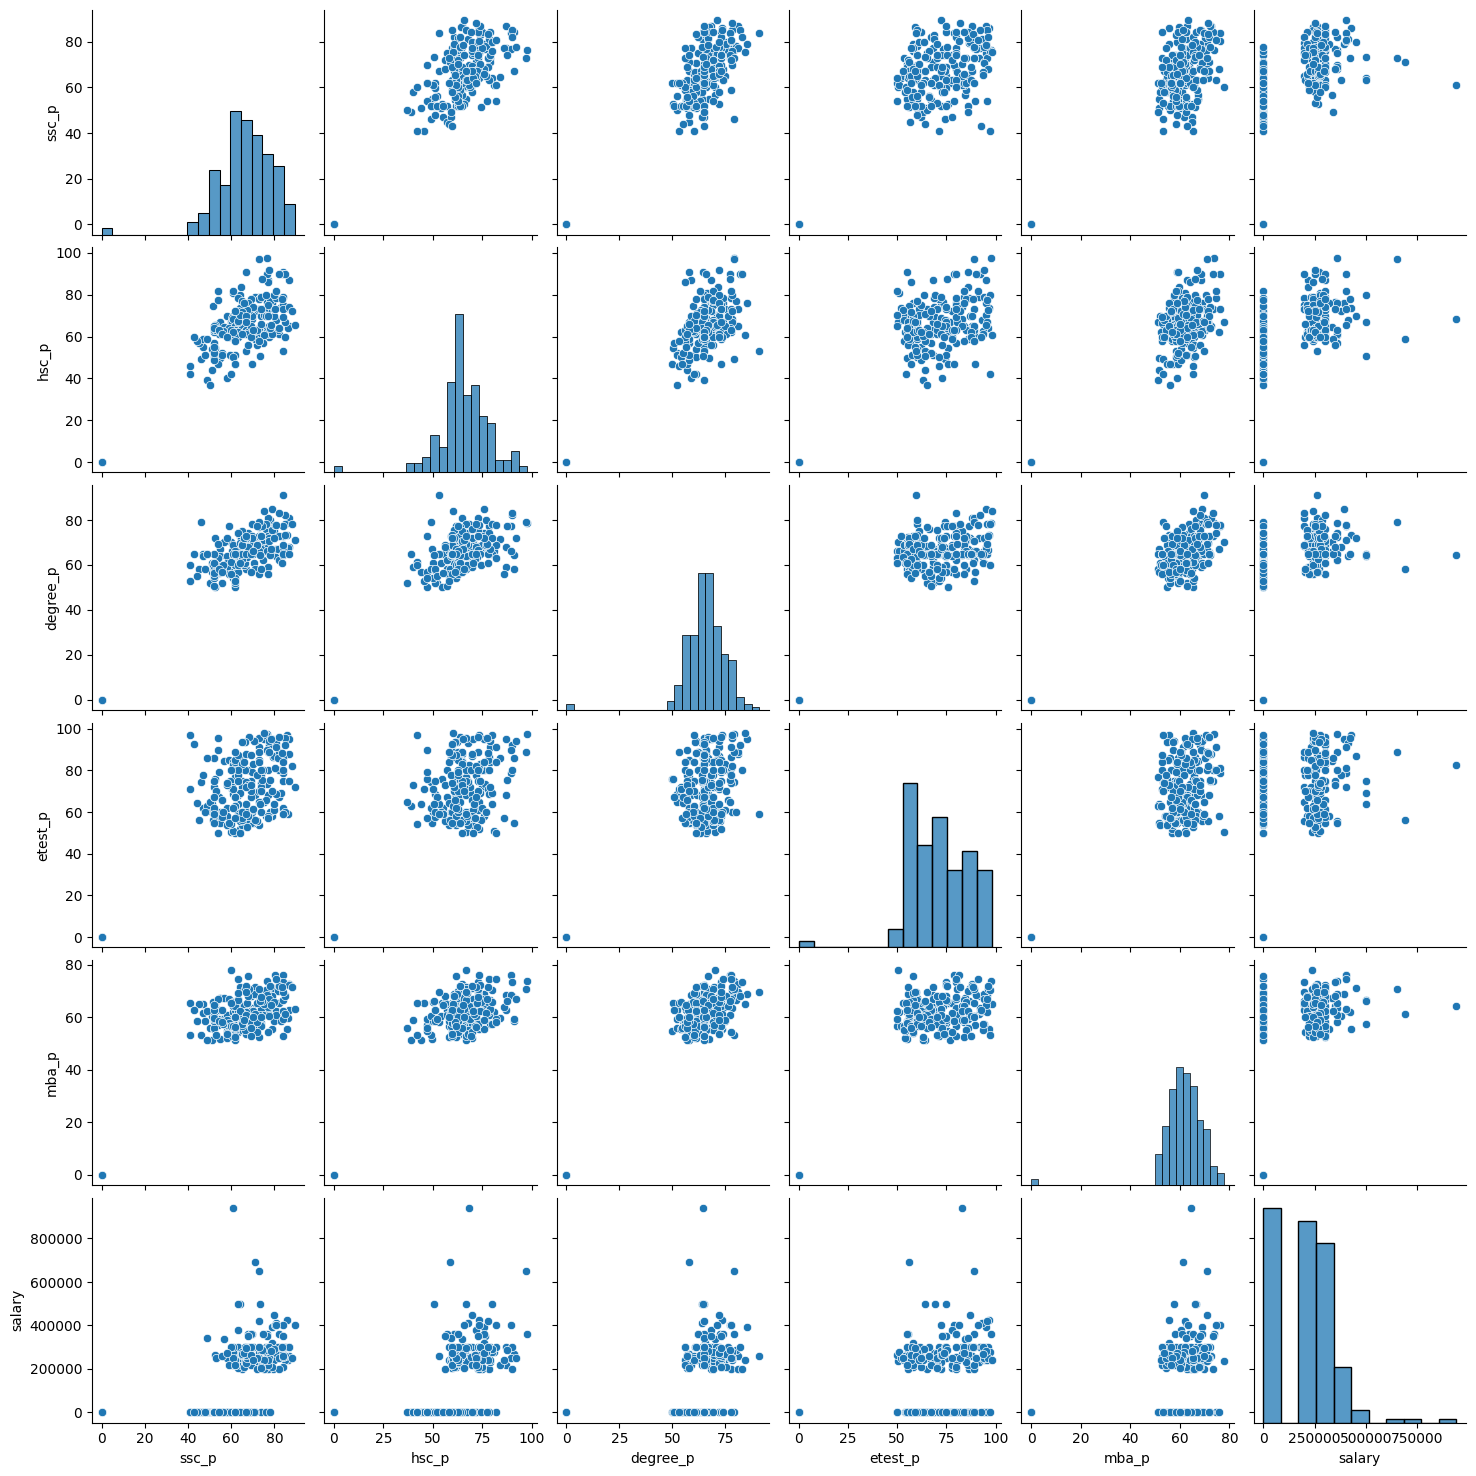

In [72]:
sns.pairplot(dataset)

In [73]:
#This pairplot used to howto correlate one column with another column and known about relation with columns.
#if we have to see degree_p and hsc_p relatons - it exbits linear pattern.

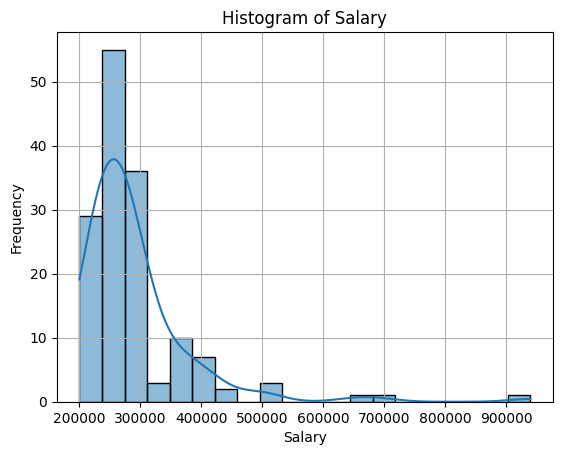

In [74]:
sns.histplot(df['salary'], bins=20, kde=True) 
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

It is a histogram plot.

More employees earn salaries between 20,000 and 30,000.